In [42]:
import numpy as np
import matplotlib.pyplot as plt
from regions import Regions
import regions
from astropy.io import fits
from astropy.wcs import WCS
from astropy.coordinates import SkyCoord
from astropy import units as u
from astropy.wcs.utils import proj_plane_pixel_scales
from astropy.visualization.wcsaxes import add_scalebar
from astropy.visualization.wcsaxes import add_beam

from smart_plotters.jwst_plots import JWSTCatalog, make_cat_use, make_brick_cat
from smart_plotters.cutout_plot import get_cutout_405, get_cutout_jwst_ice, get_cutout_spitzer, get_cutout_glimpse_rgb

In [2]:
pos_spit = SkyCoord('17:46:03.8829313173', '-28:49:49.5151755556', unit=(u.hourangle, u.deg), frame='icrs')
l = 32.7190648932*u.arcmin
w = 93.6751309956*u.arcmin

In [3]:
cutout_spit_data, cutout_spit_ww = get_cutout_glimpse_rgb(pos_spit, l, w)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.129112242229454..2.544721462002177].


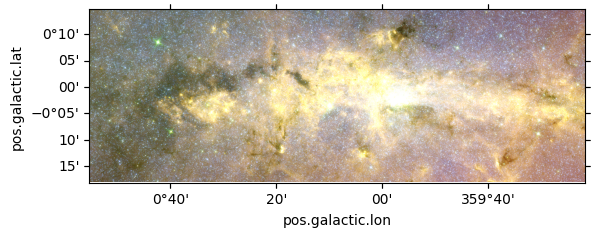

In [4]:
ax = plt.subplot(projection=cutout_spit_ww)
ax.imshow(cutout_spit_data, origin='lower')

In [29]:
pos_dustridge = SkyCoord('0.3735681202', '0.0297802806', unit=(u.deg, u.deg), frame='galactic')
dustridge_rgb, dustridge_wcs = get_cutout_glimpse_rgb(pos_dustridge, 7.6430350665*u.arcmin, 19.3494558646*u.arcmin)

#pos_dustridge = SkyCoord('17:46:37.8902929288', '-28:31:03.3576802039', unit=(u.hourangle, u.deg), frame='icrs')
#dustridge_rgb, dustridge_wcs = get_cutout_glimpse_rgb(pos_dustridge, 11.4708401977*u.arcmin, 33.0761120264*u.arcmin)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.14487639144472633..2.4561610221329233].


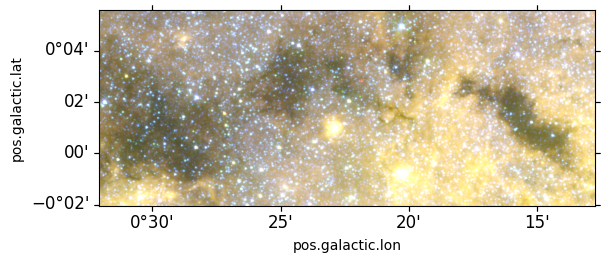

In [30]:
ax = plt.subplot(projection=dustridge_wcs)
ax.imshow(dustridge_rgb, origin='lower')

In [17]:
ra = 266.61798916*u.deg - 100*u.arcsec
dec = -28.56350962*u.deg - 25*u.arcsec
pos_cloudcd = SkyCoord(ra, dec, frame='icrs')
cloudcd_rgb, cloudcd_wcs = get_cutout_glimpse_rgb(pos_cloudcd, 4*u.arcmin, 6*u.arcmin)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.15723951565912425..2.179912190996009].


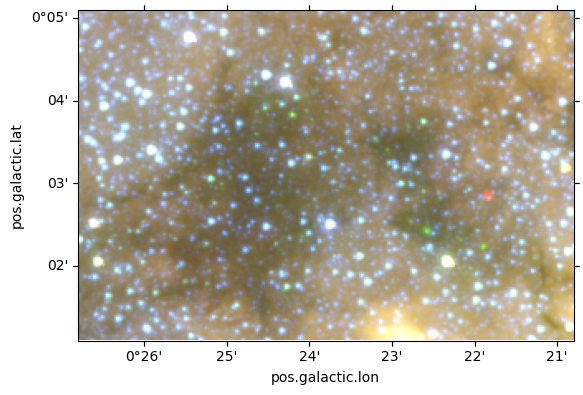

In [18]:
ax = plt.subplot(projection=cloudcd_wcs)
ax.imshow(cloudcd_rgb, origin='lower')

In [20]:
basepath = '/orange/adamginsburg/jwst/cloudc/'
reg_fov = Regions.read(f'{basepath}/regions_/f4_fov_cloudc.reg')[0]

In [21]:
gal_ang = (1*u.pc/(8.178*u.kpc)).to(u.arcsec, equivalencies=u.dimensionless_angles())

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.129112242229454..2.544721462002177].


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.14487639144472633..2.4561610221329233].
/orange/adamginsburg/miniconda3/envs/python312/lib/python3.12/site-packages/regions/shapes/polygon.py:182: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  return Polygon(xy=xy, **mpl_kwargs)
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.15723951565912425..2.179912190996009].


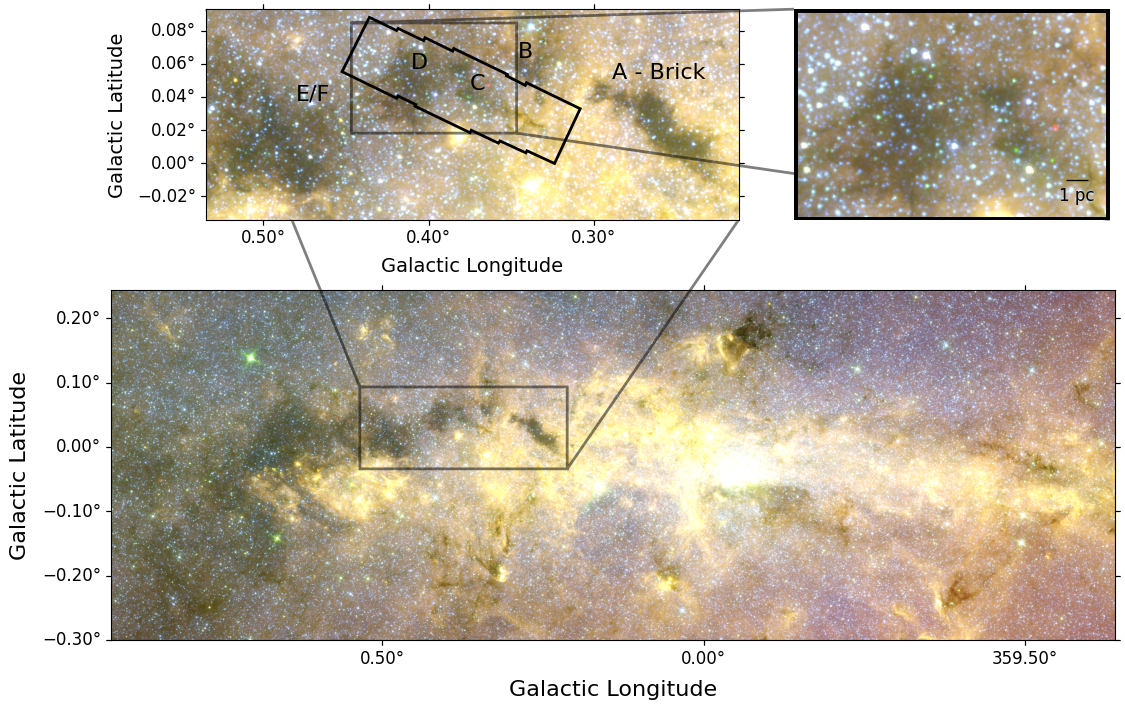

In [44]:
plt.rc('xtick', labelsize=12) 
plt.rc('ytick', labelsize=12) 

fig = plt.figure(figsize=(12, 8))
ax = plt.subplot(111, projection=cutout_spit_ww)
ax.imshow(cutout_spit_data)
#pos_dustridge = SkyCoord('17:46:37.8902929288', '-28:31:03.3576802039', unit=(u.hourangle, u.deg), frame='icrs')
#reg = regions.RectangleSkyRegion(center=pos_dustridge, width=33.0761120264*u.arcmin, height=11.4708401977*u.arcmin, angle=-58.68857810022573*u.deg)
#reg.to_pixel(spit_wcs).plot(ax=ax, color='k', linewidth=2)
ax.coords[0].set_major_formatter('d.dd')
ax.coords[1].set_major_formatter('d.dd')
ax.set_xlabel('Galactic Longitude', fontsize=16)
ax.set_ylabel('Galactic Latitude', fontsize=16)
#ax.set_axis_off()

pixelscale = u.pixel_scale(proj_plane_pixel_scales(cutout_spit_ww)[0]*u.deg/u.pix)

plt.rc('xtick', labelsize=12) 
plt.rc('ytick', labelsize=12) 

ins_ax_1 = ax.inset_axes([0.01, 1.2, 0.7, 0.6], projection=dustridge_wcs)
ins_ax_1.coords[0].set_major_formatter('d.dd')
ins_ax_1.coords[1].set_major_formatter('d.dd')
ins_ax_1.imshow(dustridge_rgb)
pos1 = SkyCoord.to_pixel(pos_dustridge, wcs=cutout_spit_ww)
dx = (19.3494558646*u.arcmin).to(u.pix, pixelscale).value
dy = (7.6430350665*u.arcmin).to(u.pix, pixelscale).value
ax.indicate_inset(inset_ax=ins_ax_1, edgecolor='k', linewidth=2, bounds=[pos1[0]-dx/2, pos1[1]-dy/2, dx, dy])
ins_ax_1.set_xlabel('Galactic Longitude', fontsize=14)
ins_ax_1.set_ylabel('Galactic Latitude', fontsize=14)
reg_fov = Regions.read(f'{basepath}/regions_/f4_fov_cloudc.reg')[0]
reg_fov.to_pixel(dustridge_wcs).plot(color='k', ax=ins_ax_1)
ins_ax_1.text(0.85, 0.7, 'A - Brick', color='k', fontsize=16, ha='center', va='center', transform=ins_ax_1.transAxes)
ins_ax_1.text(0.6, 0.8, 'B', color='k', fontsize=16, ha='center', va='center', transform=ins_ax_1.transAxes)
ins_ax_1.text(0.51, 0.65, 'C', color='k', fontsize=16, ha='center', va='center', transform=ins_ax_1.transAxes)
ins_ax_1.text(0.4, 0.75, 'D', color='k', fontsize=16, ha='center', va='center', transform=ins_ax_1.transAxes)
ins_ax_1.text(0.2, 0.6, 'E/F', color='k', fontsize=16, ha='center', va='center', transform=ins_ax_1.transAxes)

ins_ax_2 = ins_ax_1.inset_axes([1.05, 0.0, 0.7, 1.0], projection=cloudcd_wcs)
ins_ax_2.coords[0].set_major_formatter('d.dd')
ins_ax_2.coords[1].set_major_formatter('d.dd')
ins_ax_2.imshow(cloudcd_rgb)
reg = regions.RectangleSkyRegion(center=pos_cloudcd.galactic, width=6*u.arcmin-1*u.arcsec, height=4*u.arcmin, angle=0*u.deg)
pixel_region = reg.to_pixel(cloudcd_wcs)
pixel_region.plot(ax=ins_ax_2, color='k', linewidth=5)
#add_scalebar(ins_ax_2, si_ang, color='k', label='1 pc', fontproperties={"size": 20})
add_scalebar(ins_ax_2, gal_ang, color='k', label="1 pc", corner='bottom right', fontproperties={"size": 12})
ins_ax_2.set_axis_off()
pos2 = SkyCoord.to_pixel(pos_cloudcd, wcs=dustridge_wcs)
dy = (4*u.arcmin).to(u.pix, pixelscale).value
dx = (6*u.arcmin).to(u.pix, pixelscale).value
ins_ax_1.indicate_inset(inset_ax=ins_ax_2, edgecolor='k', linewidth=2, bounds=[pos2[0]-dx/2, pos2[1]-dy/2, dx, dy])

plt.tight_layout()